In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Load the dataset
data = pd.read_csv("student_spending (1).csv")

In [13]:
# One-hot encoding for categorical variables
X = pd.get_dummies(data.drop(columns=['preferred_payment_method']))
y = data['preferred_payment_method']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with the number of CPU cores you want to use

# Training the KNN model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = knn_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Accuracy of the KNN model: 0.305


In [15]:
# Assuming new_data is a DataFrame containing the new data for prediction
new_data = pd.DataFrame({
    'age': [25],
    'gender': ['Female'],
    'year_in_school': ['Senior'],
    'major': ['Computer Science'],
    'monthly_income': [1200],
    'financial_aid': [300],
    'tuition': [5000],
    'housing': [700],
    'food': [250],
    'transportation': [100],
    'books_supplies': [150],
    'entertainment': [50],
    'personal_care': [100],
    'technology': [50],
    'health_wellness': [200],
    'miscellaneous': [75]
})

# Create a list of all feature names seen during training
all_feature_names = X.columns.tolist()

# Create a dictionary to store new data with all features, initializing missing ones to zero
new_data_dict = {
    feature_name: 0 if feature_name not in new_data.columns else new_data[feature_name].iloc[0]
    for feature_name in all_feature_names
}

# Convert the dictionary to a DataFrame
new_data_with_all_features = pd.DataFrame(new_data_dict, index=[0])

# Scaling the new data
new_data_scaled = scaler.transform(new_data_with_all_features)

# Making predictions on the new data
new_prediction = knn_model.predict(new_data_scaled)
print("Predicted preferred payment method for new data:", new_prediction)

Predicted preferred payment method for new data: ['Cash']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

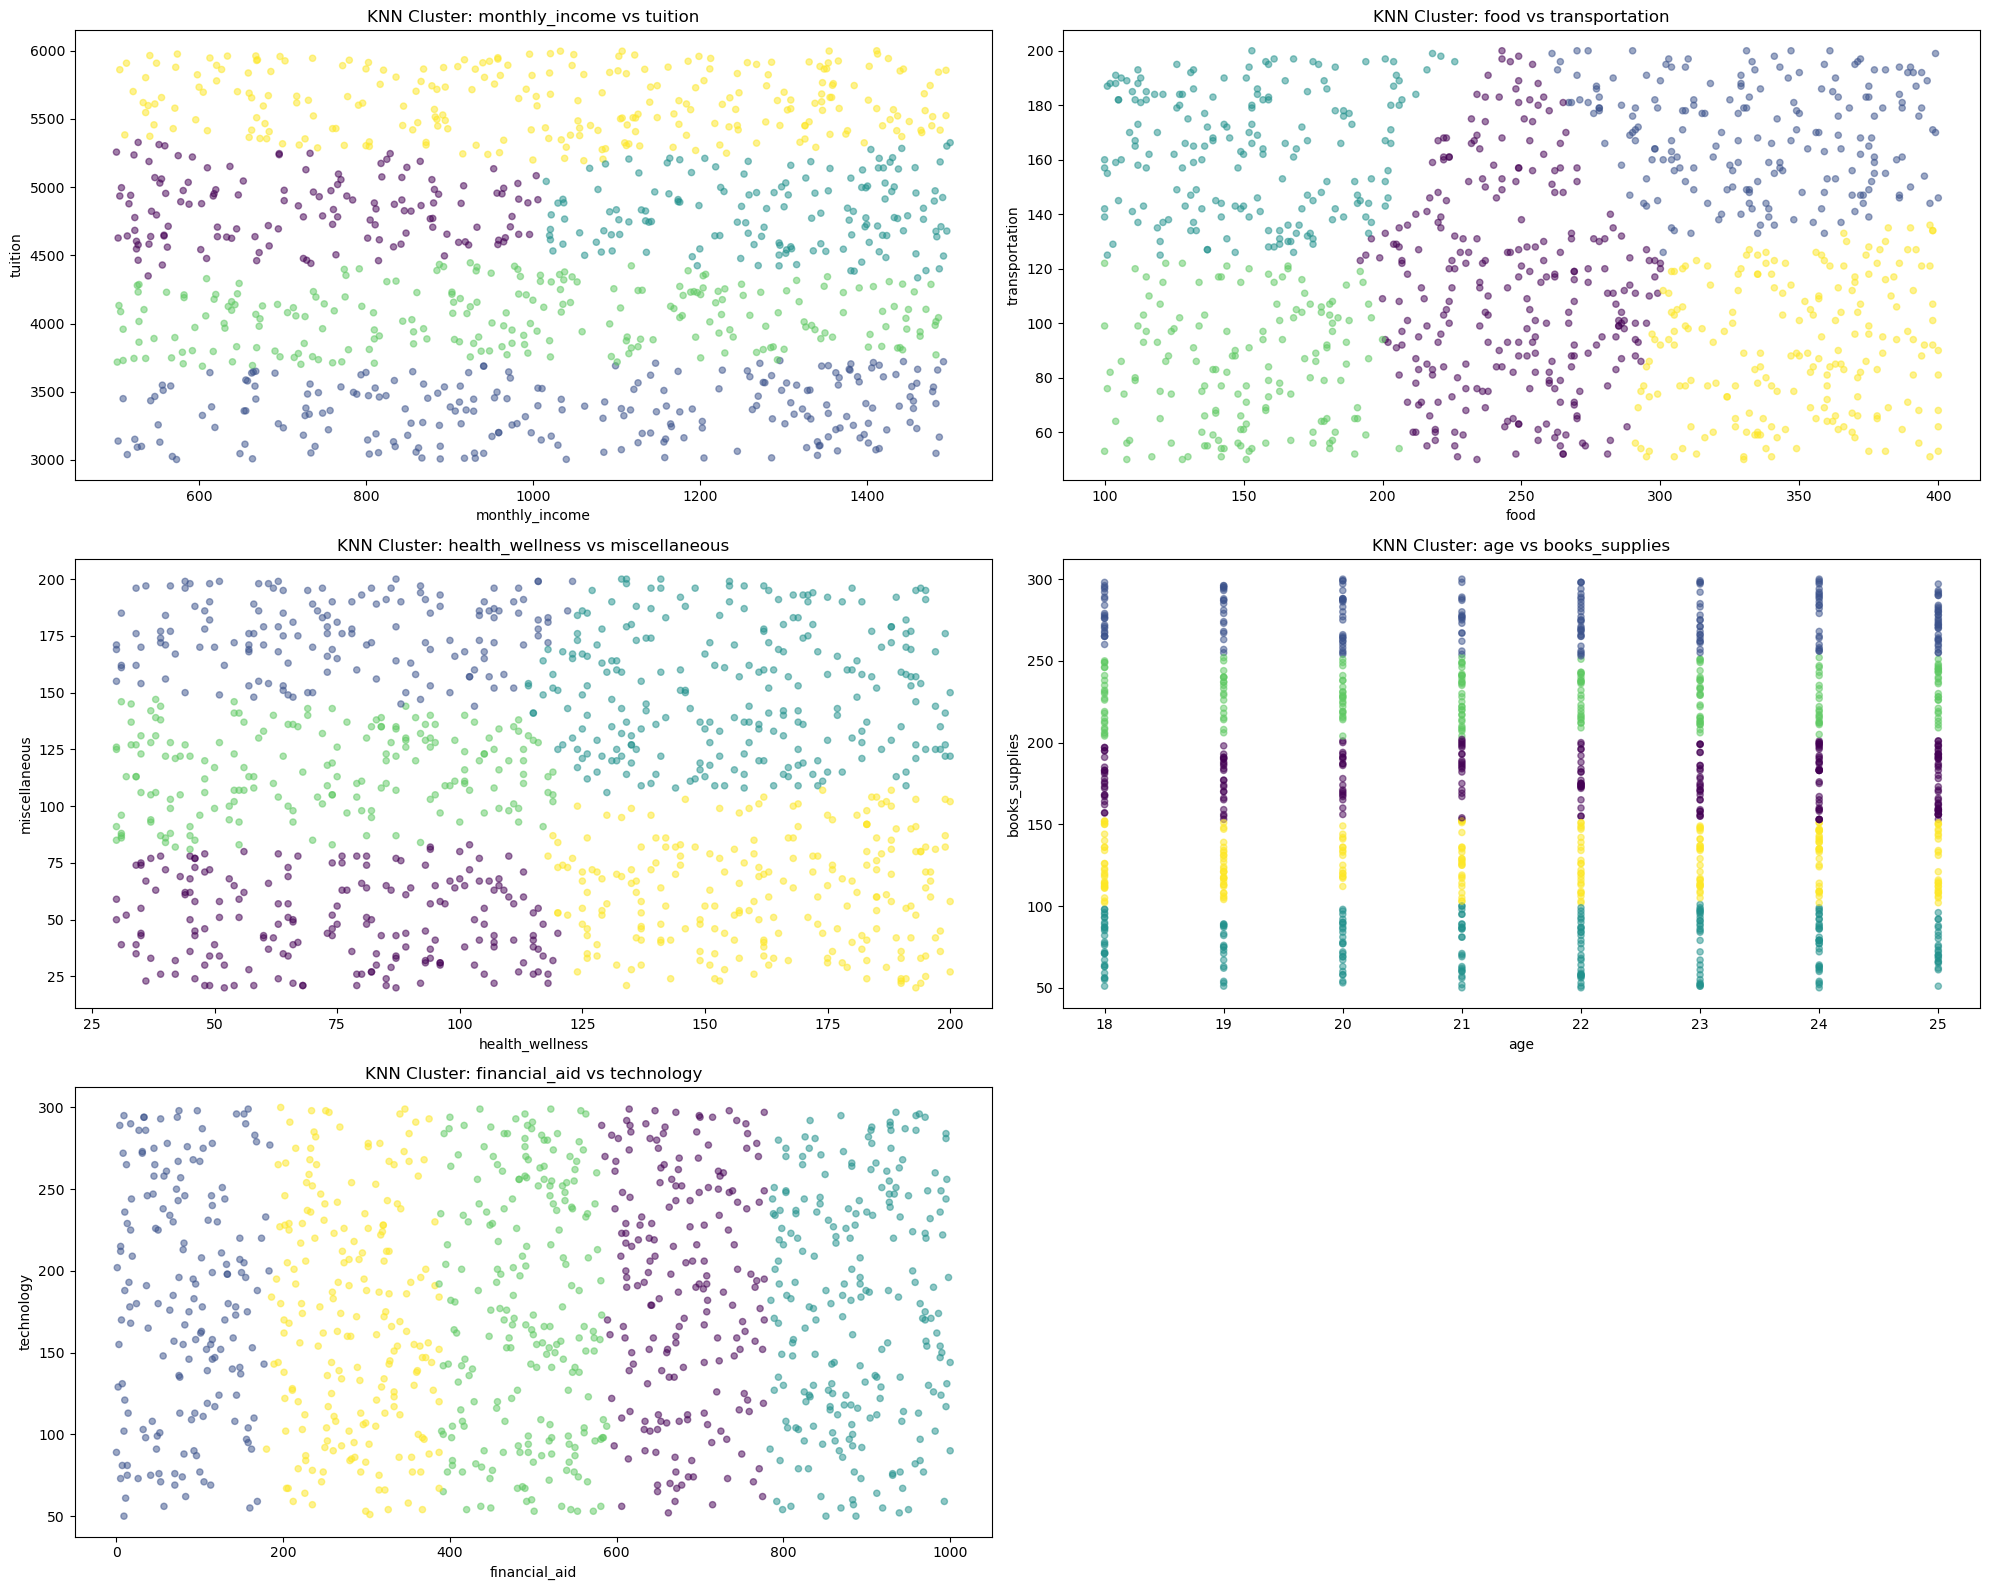

In [16]:
import os

# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '4'

# Now import scikit-learn and other necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
student_spending_df = pd.read_csv('student_spending (1).csv')

# Define the combinations of features
feature_combinations = [
    ('monthly_income', 'tuition'),
    ('food', 'transportation'),
    ('health_wellness', 'miscellaneous'),
    ('age', 'books_supplies'),
    ('financial_aid', 'technology')
]

# Specify the number of clusters
k = 5

# Create scatter plots for each feature combination
plt.figure(figsize=(20, 16))
for i, (feature1, feature2) in enumerate(feature_combinations, 1):
    X_pair = student_spending_df[[feature1, feature2]].values
    knn_model = KMeans(n_clusters=k, random_state=42, n_init=10)  # Suppress FutureWarning
    cluster_labels = knn_model.fit_predict(X_pair)
    
    plt.subplot(3, 2, i)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.5)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KNN Cluster: {feature1} vs {feature2}')

plt.tight_layout()
plt.show()